<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/Reto3_Valeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Google Minería de Datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Gráficador - DashBoards
import seaborn as sns

Mounted at /content/drive


1. Se carga la base de datos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


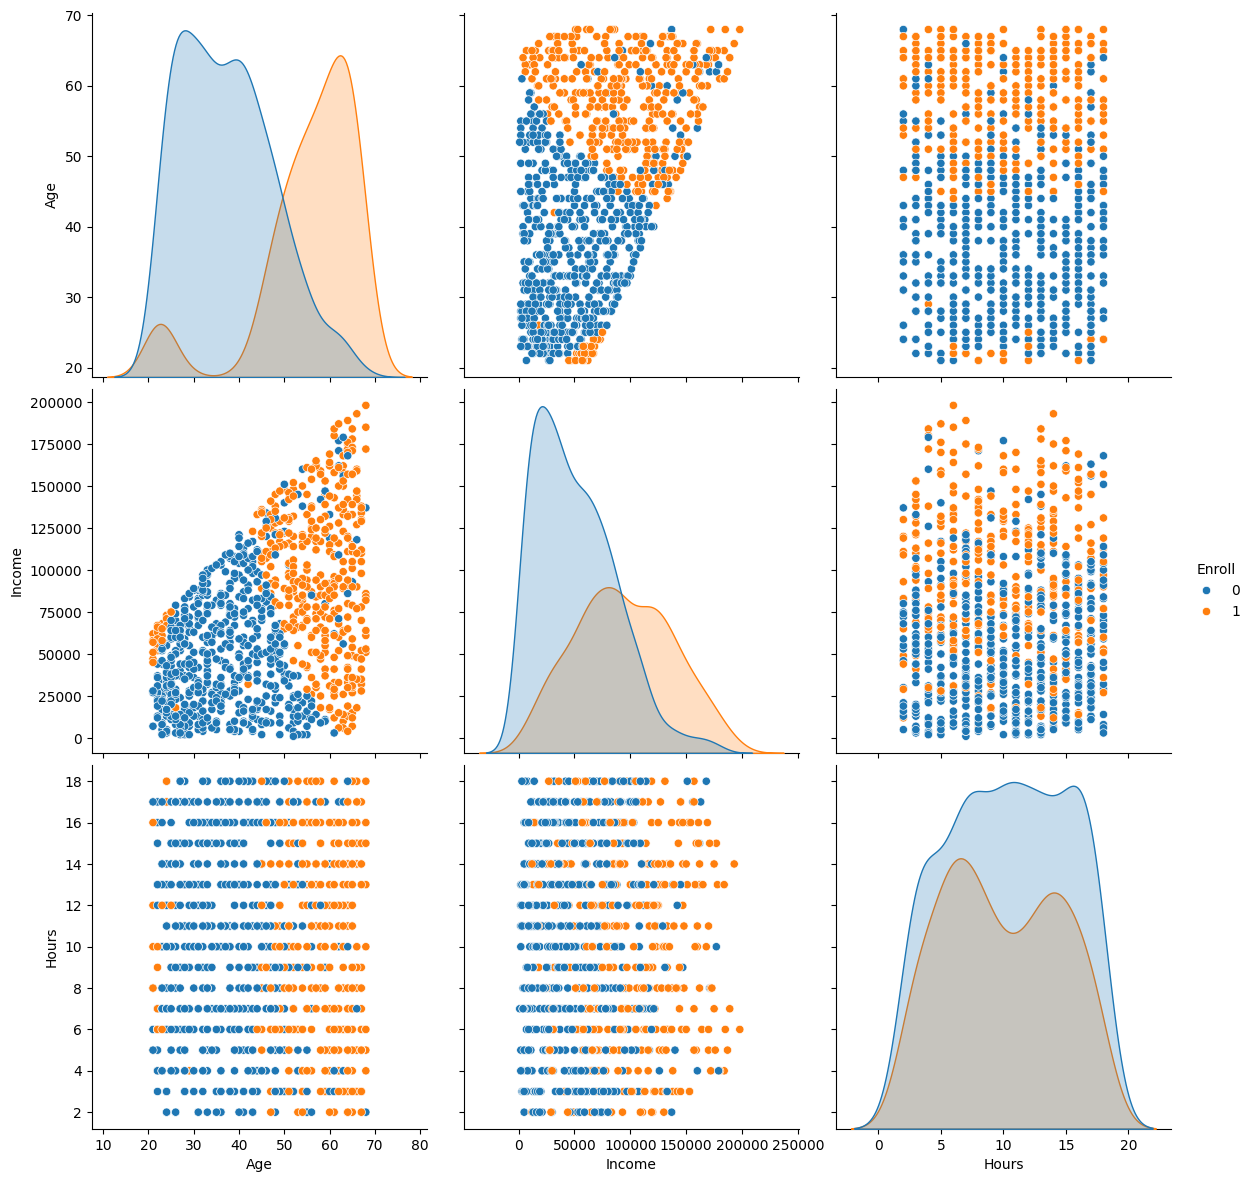

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/3. Taller 3 - Gym_Data_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()

#Se crea el DashBoard
sns.pairplot(XDB,hue='Enroll',size=4,vars=['Age','Income','Hours'])

2. Modelo KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


La precisión en el pronóstico es: 0.848
El coeficiente de sensibilidad 0.8503937007874016
El coeficiente de espicificidad 0.8438356164383561
La decisión frente al pronóstico de membresía es: [0]


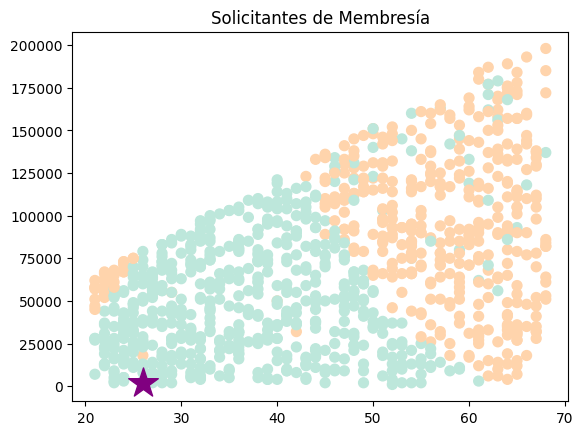

In [ ]:
#Datos de Entrada - Datos de Salida
XD=np.array(XDB[['Age','Income','Hours']])
yd=np.array(XDB[['Enroll']])

mknn=KNeighborsClassifier()
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

print("La precisión en el pronóstico es:",metrics.accuracy_score(yd,ydp))

#Matriz de Confusión
cm=confusion_matrix(yd,ydp)
VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]

#Porcentajes de Comportamiento
print("El coeficiente de sensibilidad",VP/(VP+FP))
print("El coeficiente de espicificidad",VN/(FN+VN))

#Se evalua a una persona con características específicas
XDi=np.array([(26,1800,14)])
ydi=mknn.predict(XDi)
print("La decisión frente al pronóstico de membresía es:",ydi)

#Gráfica de solicitantes de membresía
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='icefire')
plt.scatter(XDi[:,0],XDi[:,1],marker='*',s=500,facecolors='purple')
plt.title("Solicitantes de Membresía")
plt.show()


3. Modelo KMeans

In [ ]:
np.random.seed(42)
k=5

mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)

labels=mkm.labels_
centroids=mkm.cluster_centers_

print("La conformación de los centroides es:\n",centroids)

#Se analiza a una persona
ydk=mkm.predict(XDi)
print("La persona analizada pertenece al cluster:",ydk)

#Cantidad de personas por cluster y su agrupación por categoría (0= negados y 1=aprobados)
XDB['cluster']=labels
counts_1=np.bincount(labels)
counts_2=XDB.groupby('cluster').agg({"Enroll":lambda x: (x==0).sum()})
counts_3=XDB.groupby('cluster').agg({"Enroll":lambda x: (x==1).sum()})

df=pd.DataFrame(np.column_stack((counts_1,counts_2,counts_3)))


,0,1,2
0,153,44,109
1,220,117,103
2,241,163,78
3,309,260,49
4,77,13,64


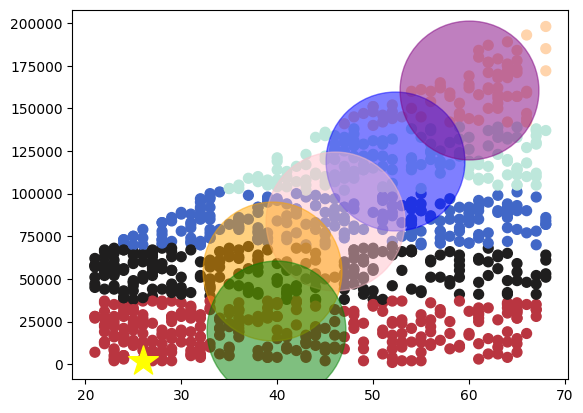

In [ ]:
#Gráfica de solicitantes de membresía

plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='icefire')
plt.scatter(XDi[:,0],XDi[:,1],marker='*',s=500,facecolors='yellow')

#Centroide 1
plt.scatter(centroids[0,0],centroids[0,1],marker='o', alpha=0.5,s=10000,facecolors='blue')
#Centroide 2
plt.scatter(centroids[1,0],centroids[1,1],marker='o',alpha=0.5,s=10000,facecolors='pink')
#Centroide 3
plt.scatter(centroids[2,0],centroids[2,1],marker='o', alpha=0.5,s=10000,facecolors='orange')
#Centroide 4
plt.scatter(centroids[3,0],centroids[3,1],marker='o',alpha=0.5,s=10000,facecolors='green')
#Centroide 5
plt.scatter(centroids[4,0],centroids[4,1],marker='o',alpha=0.5,s=10000,facecolors='purple')
plt.show()


In [ ]:
#Porcentaje de Negados del cluster de mayor ingresos
pni=(13/77)*100
print("El porcentaje de los negados del cluster de mayor ingresos es de:",pni)

#Porcentaje de Aprobados del cluster de mayor ingresos
pai=(64/77)*100
print("El porcentaje de los aprobación del cluster de mayor ingresos es de:",pai)

#Porcentaje de Negados de la persona
pn=(260/309)*100
print("El porcentaje de los negados es de:",pn)

#Porcentaje de Aprobados la persona
pa=(49/309)*100
print("El porcentaje de los aprobación es de:",pa)


El porcentaje de los negados del cluster de mayor ingresos es de: 16.883116883116884
El porcentaje de los aprobación del cluster de mayor ingresos es de: 83.11688311688312
El porcentaje de los negados es de: 84.14239482200647
El porcentaje de los aprobación es de: 15.857605177993527


4. Análisis de Resultados

Con base al proceso de análisis, se puede observar que las dos variables que cuentan con mayor correlación frente al prónostico de membresia son la edad con los ingresos. Mientras que por el otro lado, la variable que tiene la mayor diferenciación frente a la variable del pronóstico de la membresia es la edad.
Adicionalmente, el comportamiento del modelo KNN arrojó una precisión del 84,8%, una sensibilidad del 85% y una especificidad del 84%. Asimismo, se analizo a una persona con 26 años, un ingreso de 1800 y 14 horas dedicadas al gimnasio. De acuerdo con estas características el sistema mostró que este personaje no obtendría la memebresía.

Por otro lado, cuando se ejecuta el modelo KMeans, arroja que el cluster que tiene la menor edad para el modelo KMeans es el cluster 2, al igual que el 4 es el que tiene mayor número de ingresos, y el cluster 0 es el que posee la menor cantidad de dedicación de horas en el gimnasio. Basandonos en que el cluster que tiene los mayores ingresos es el 4, con un porcentaje de negados de 16.88% y un porcentaje de aprobados de 83.11%.
También, a la hora de analizar el modelo, este muestra como una persona con 26 años, un ingreso de 1800 y 14 horas dedicadas al gimnasio, hará parte del cluster 3, teniendo como porcentaje de aprobación y negación 15.85% y 84.14% respectivamente.